In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("F:\machine_learning_c\ML_data\P14-Logistic-Regression\Logistic_Regression/Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = data.iloc[:,[2,3]].values

In [5]:
y = data.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test  = sc_x.fit_transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski')

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
y_predict = knn.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test,y_predict)

In [15]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


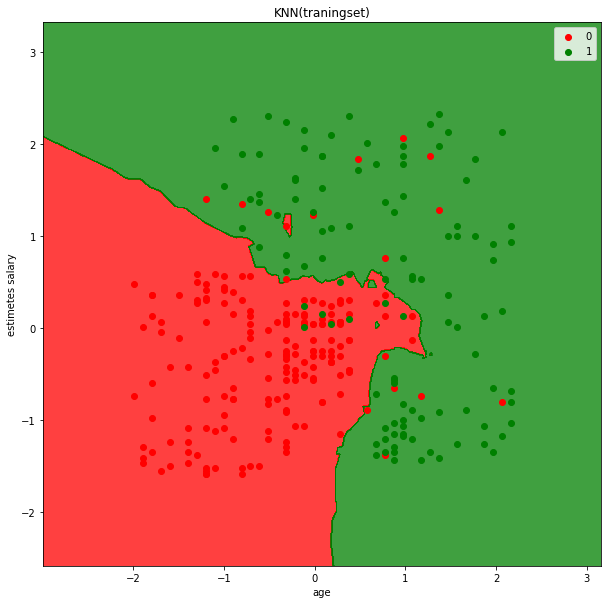

In [21]:
#visulaizing the training set result
from matplotlib.colors import ListedColormap
plt.figure(figsize=[10,10])
X_set,y_set  = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1,stop=X_set[:,0].max() +1,step=0.01),np.arange(start=X_set[:,1].min() -1,stop=X_set[:,1].max() +1,step=0.01))
plt.contourf(X1,X2,knn.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)
plt.title("KNN(traningset)")
plt.xlabel("age")
plt.ylabel('estimetes salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


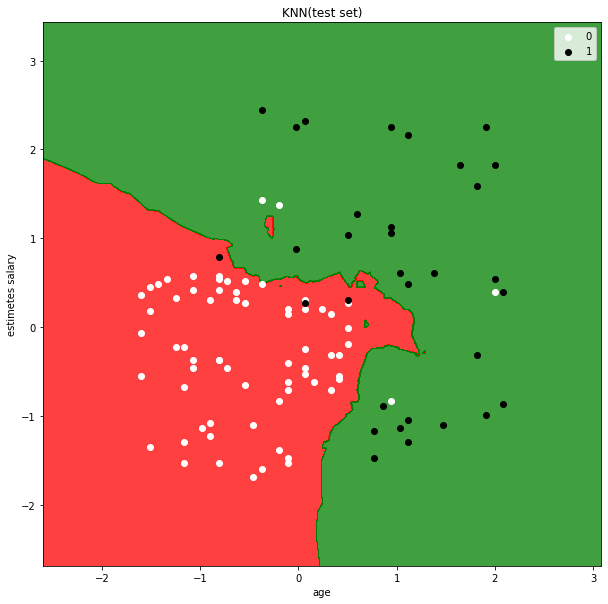

In [23]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=[10,10])
X_set,y_set  = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1,stop=X_set[:,0].max() +1,step=0.01),np.arange(start=X_set[:,1].min() -1,stop=X_set[:,1].max() +1,step=0.01))
plt.contourf(X1,X2,knn.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(("white","black"))(i),label=j)
plt.title("KNN(test set)")
plt.xlabel("age")
plt.ylabel('estimetes salary')
plt.legend()
plt.show()